<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [82]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.4.1
Using keras version 2.4.3


## Loading and preparing the MNIST dataset

Again, load the dataset via ```keras.datasets```, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [83]:
from keras.datasets import mnist
# START CODE HERE
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path="mnist.npz")
# END CODE HERE

In [84]:
from keras.utils.np_utils import to_categorical

# START CODE HERE
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# END CODE HERE

In [85]:
# Reshape to proper images with 1 color channel according to backend scheme
# START CODE HERE
train_images = train_images.reshape(train_images.shape[0],784)
test_images = test_images.reshape(test_images.shape[0],784)
# END CODE HERE

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HERE

train_images=(train_images - np.mean(train_images))/(np.std(train_images))
# END CODE HERE

## Defining the neural network architecture (i.e., the network model)

You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

### Classifier of the first exercice

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


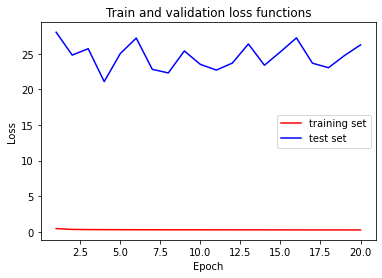

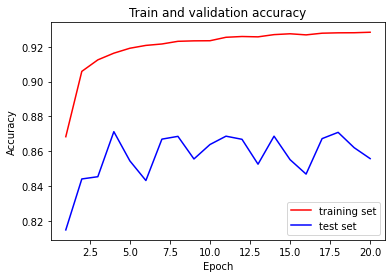

In [86]:
input_shape = 784
output_shape = 10
model_ = Sequential()
model_.add(Dense(output_shape, activation='softmax'))

sgd = optimizers.SGD(lr=0.01)
model_.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


history_=model_.fit(train_images,train_labels, verbose=0, epochs=20, batch_size=40,validation_data=(test_images,test_labels))
# END CODE HERE

# We now want to plot the train and validation loss functions and accuracy curves
print(history_.history.keys())
# summarize history for loss
# START CODE HERE

plt.plot(np.arange(1,21),history_.history['loss'],color='r',label='training set')
plt.plot(np.arange(1,21),history_.history['val_loss'],color='b',label='test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and validation loss functions')
plt.legend()
plt.show()
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE

plt.plot(np.arange(1,21),history_.history['accuracy'],color='r',label='training set')
plt.plot(np.arange(1,21),history_.history['val_accuracy'],color='b',label='test set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and validation accuracy')
plt.legend()

# END CODE HERE
plt.show()

### Fully connected network

In [87]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# START CODE HERE
input_shape = 784
output_shape = 10

model = Sequential()
model.add(Dense(300, input_dim = input_shape, activation ='sigmoid'))
model.add(Dense(output_shape, activation='softmax'))

# END CODE HERE

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [88]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

# START CODE HERE
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# END CODE HERE
# We can now have a look at the defined model topology
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_84 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [89]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 20

# START CODE HERE
history=model.fit(train_images, train_labels,verbose=0, epochs=epochs, batch_size=10,validation_data=(test_images,test_labels))
# END CODE HERE

## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


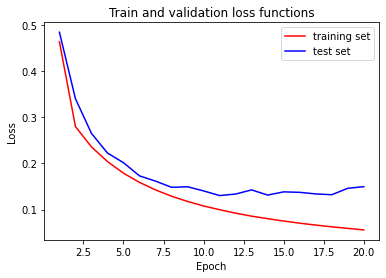

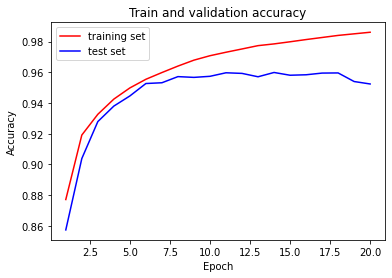

In [90]:
# We now want to plot the train and validation loss functions and accuracy curves
print(history.history.keys())
# summarize history for loss
# START CODE HERE

plt.plot(np.arange(1,epochs+1),history.history['loss'],color='r',label='training set')
plt.plot(np.arange(1,epochs+1),history.history['val_loss'],color='b',label='test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and validation loss functions')
plt.legend()
plt.show()
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE

plt.plot(np.arange(1,epochs+1),history.history['accuracy'],color='r',label='training set')
plt.plot(np.arange(1,epochs+1),history.history['val_accuracy'],color='b',label='test set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and validation accuracy')
plt.legend()

# END CODE HERE
plt.show()


## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

### Increasing the size of the batch

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_86 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


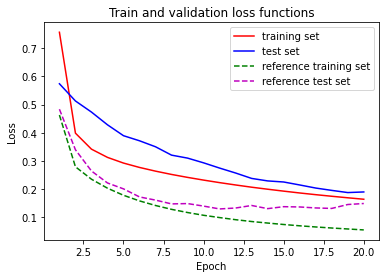

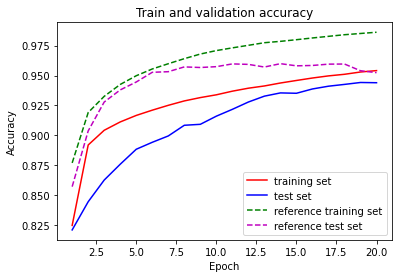

In [91]:
model2 = Sequential()
model2.add(Dense(300, input_dim = input_shape, activation ='sigmoid'))
model2.add(Dense(output_shape, activation='softmax'))


sgd = optimizers.SGD(lr=0.01)
model2.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model2.summary()

history2=model2.fit(train_images,train_labels, verbose=0, epochs=epochs, batch_size=40,validation_data=(test_images,test_labels))
# END CODE HERE

# We now want to plot the train and validation loss functions and accuracy curves
print(history2.history.keys())
# summarize history for loss
# START CODE HERE

plt.plot(np.arange(1,epochs+1),history2.history['loss'],color='r',label='training set')
plt.plot(np.arange(1,epochs+1),history2.history['val_loss'],color='b',label='test set')
plt.plot(np.arange(1,epochs+1),history.history['loss'], linestyle='dashed',color='g',label='reference training set')
plt.plot(np.arange(1,epochs+1),history.history['val_loss'],color='m', linestyle='dashed',label='reference test set')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and validation loss functions')
plt.legend()
plt.show()
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE

plt.plot(np.arange(1,epochs+1),history2.history['accuracy'],color='r',label='training set')
plt.plot(np.arange(1,epochs+1),history2.history['val_accuracy'],color='b',label='test set')
plt.plot(np.arange(1,epochs+1),history.history['accuracy'],color='g', linestyle='dashed',label='reference training set')
plt.plot(np.arange(1,epochs+1),history.history['val_accuracy'],color='m', linestyle='dashed',label='reference test set')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and validation accuracy')
plt.legend()

# END CODE HERE
plt.show()


We see here that increasing the batch size from 10 to 40 decreased the accuracy in the results when training the same model for 10 epochs. 

### Replacing the sigmoid activations with Relus

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_88 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


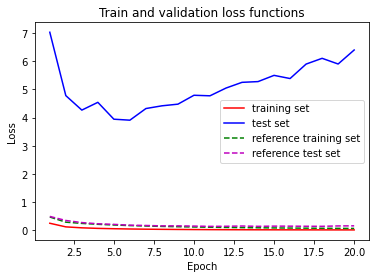

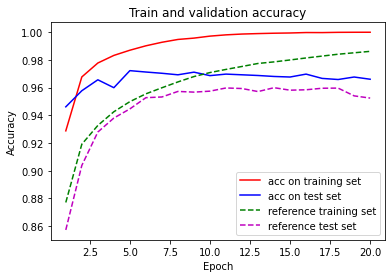

In [92]:
model3 = Sequential()
model3.add(Dense(300, input_dim = input_shape, activation ='relu'))
model3.add(Dense(output_shape, activation='softmax'))


sgd = optimizers.SGD(lr=0.01)
model3.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model3.summary()

history3=model3.fit(train_images, train_labels, verbose=0, epochs=epochs, batch_size=10,validation_data=(test_images,test_labels))
# END CODE HERE

# We now want to plot the train and validation loss functions and accuracy curves
print(history3.history.keys())
# summarize history for loss
# START CODE HERE

plt.plot(np.arange(1,epochs+1),history3.history['loss'],color='r',label='training set')
plt.plot(np.arange(1,epochs+1),history3.history['val_loss'],color='b',label='test set')
plt.plot(np.arange(1,epochs+1),history.history['loss'], linestyle='dashed',color='g',label='reference training set')
plt.plot(np.arange(1,epochs+1),history.history['val_loss'], linestyle='dashed',color='m',label='reference test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and validation loss functions')
plt.legend()
plt.show()
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE

plt.plot(np.arange(1,epochs+1),history3.history['accuracy'],color='r',label='acc on training set')
plt.plot(np.arange(1,epochs+1),history3.history['val_accuracy'],color='b',label='acc on test set')
plt.plot(np.arange(1,epochs+1),history.history['accuracy'], linestyle='dashed',color='g',label='reference training set')
plt.plot(np.arange(1,epochs+1),history.history['val_accuracy'], linestyle='dashed',color='m',label='reference test set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and validation accuracy')
plt.legend()

# END CODE HERE
plt.show()

Here we can see that the accuracy is little bit better with Relu instead especially for the first epochs of the sigmoid activations

### With a larger architecture : (784)→(300)→(128)→(84)→(10)


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_90 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_91 (Dense)             (None, 84)                10836     
_________________________________________________________________
dense_92 (Dense)             (None, 10)                850       
Total params: 285,714
Trainable params: 285,714
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


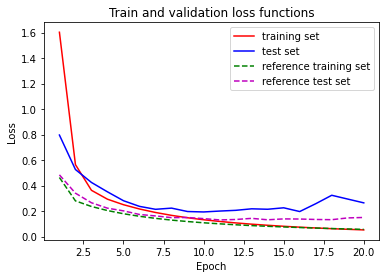

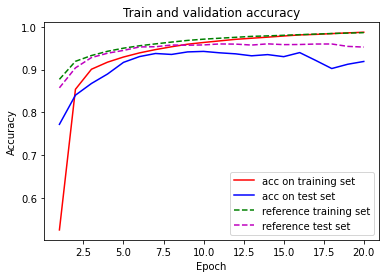

In [93]:
model4 = Sequential()
model4.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model4.add(Dense(128, activation='sigmoid'))
model4.add(Dense(84, activation='sigmoid'))
model4.add(Dense(output_shape, activation='softmax'))

sgd = optimizers.SGD(lr=0.01)
model4.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model4.summary()

history4=model4.fit(train_images, train_labels,verbose=0, epochs=epochs, batch_size=10,validation_data=(test_images,test_labels))
# END CODE HERE

# We now want to plot the train and validation loss functions and accuracy curves
print(history4.history.keys())
# summarize history for loss
# START CODE HERE

plt.plot(np.arange(1,epochs+1),history4.history['loss'],color='r',label='training set')
plt.plot(np.arange(1,epochs+1),history4.history['val_loss'],color='b',label='test set')
plt.plot(np.arange(1,epochs+1),history.history['loss'], linestyle='dashed',color='g',label='reference training set')
plt.plot(np.arange(1,epochs+1),history.history['val_loss'], linestyle='dashed',color='m',label='reference test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and validation loss functions')
plt.legend()
plt.show()
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE

plt.plot(np.arange(1,epochs+1),history4.history['accuracy'],color='r',label='acc on training set')
plt.plot(np.arange(1,epochs+1),history4.history['val_accuracy'],color='b',label='acc on test set')
plt.plot(np.arange(1,epochs+1),history.history['accuracy'], linestyle='dashed',color='g',label='reference training set')
plt.plot(np.arange(1,epochs+1),history.history['val_accuracy'], linestyle='dashed',color='m',label='reference test set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and validation accuracy')
plt.legend()

# END CODE HERE
plt.show()



Here results are close but the simpler architecture gives a better result. 
